# NYPD COMPLAINTS DATA VISUALIZATION

## FINAL PROJECT
## INFORMATION VISUALIZATION CS-GY 6313

### By NIKHIL KISHAN KHANEJA (nkk6190@nyu.edu)

### This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD)
### https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i


In [97]:
import pandas as pd
import ast
from sodapy import Socrata
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from keplergl import KeplerGl
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
client = Socrata("data.cityofnewyork.us", None)

In [3]:
results = client.get("qgea-i56i",order = "cmplnt_fr_dt DESC",limit = 1000000)
results_df = pd.DataFrame.from_records(results)

In [4]:
df = pd.read_csv('data.csv')

In [58]:
df2 = df

In [6]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 35 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   cmplnt_num         1000000 non-null  object
 1   cmplnt_fr_tm       999999 non-null   object
 2   cmplnt_to_dt       886371 non-null   object
 3   cmplnt_to_tm       886812 non-null   object
 4   addr_pct_cd        999997 non-null   object
 5   rpt_dt             1000000 non-null  object
 6   ky_cd              1000000 non-null  object
 7   ofns_desc          999982 non-null   object
 8   pd_cd              999179 non-null   object
 9   pd_desc            999179 non-null   object
 10  crm_atpt_cptd_cd   1000000 non-null  object
 11  law_cat_cd         1000000 non-null  object
 12  boro_nm            999147 non-null   object
 13  loc_of_occur_desc  827601 non-null   object
 14  prem_typ_desc      996409 non-null   object
 15  juris_desc         1000000 non-null  object
 16  j

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109543 entries, 0 to 109542
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         109543 non-null  int64  
 1   ADDR_PCT_CD        109543 non-null  int64  
 2   BORO_NM            109485 non-null  object 
 3   CMPLNT_FR_DT       109543 non-null  object 
 4   CMPLNT_FR_TM       109543 non-null  object 
 5   CMPLNT_TO_DT       93527 non-null   object 
 6   CMPLNT_TO_TM       93577 non-null   object 
 7   CRM_ATPT_CPTD_CD   109543 non-null  object 
 8   HADEVELOPT         5822 non-null    object 
 9   HOUSING_PSA        8981 non-null    float64
 10  JURISDICTION_CODE  109486 non-null  float64
 11  JURIS_DESC         109543 non-null  object 
 12  KY_CD              109543 non-null  int64  
 13  LAW_CAT_CD         109543 non-null  object 
 14  LOC_OF_OCCUR_DESC  90151 non-null   object 
 15  OFNS_DESC          109539 non-null  object 
 16  PA

In [8]:
results_df.drop(['cmplnt_to_tm','rpt_dt','pd_cd','pd_desc','juris_desc','jurisdiction_code','housing_psa','x_coord_cd','y_coord_cd','lat_lon','patrol_boro','parks_nm','hadevelopt','transit_district','station_name'],axis = 1,inplace = True)

In [9]:
df.drop(['CMPLNT_TO_TM','RPT_DT','PD_CD','PD_DESC','JURIS_DESC','JURISDICTION_CODE','HOUSING_PSA','X_COORD_CD','Y_COORD_CD','Lat_Lon','PATROL_BORO','PARKS_NM','HADEVELOPT','TRANSIT_DISTRICT','STATION_NAME'],axis = 1,inplace = True)


In [10]:
results_df.dropna(subset=['cmplnt_fr_tm'], inplace=True)

In [11]:
results_df['date'] = pd.to_datetime(results_df['cmplnt_fr_dt'],errors = 'coerce')
df['date'] = pd.to_datetime(df['CMPLNT_FR_DT'],errors = 'coerce')

In [12]:
results_df['month'] = results_df['date'].dt.month
results_df['year'] =results_df['date'].dt.year
results_df['day'] = results_df['date'].dt.day

df['month'] = df['date'].dt.month
df['year'] =df['date'].dt.year
df['day'] = df['date'].dt.day

In [13]:
df['SUSP_AGE_GROUP'].value_counts()

25-44      28390
UNKNOWN    27560
18-24      10642
45-64      10544
<18         3412
65+          849
2018           3
1018           2
928            2
938            1
-2             1
1967           1
952            1
920            1
954            1
Name: SUSP_AGE_GROUP, dtype: int64

In [14]:
values = ['-958', '-43','-974', '-972', '972', '951', '-942']
val = [np.nan, '928','952', '1018', '920', '2018', '938', '-2', '954', '1967']
df = df[df['VIC_AGE_GROUP'].isin(values) == False]
df = df[df['SUSP_AGE_GROUP'].isin(val) == False]

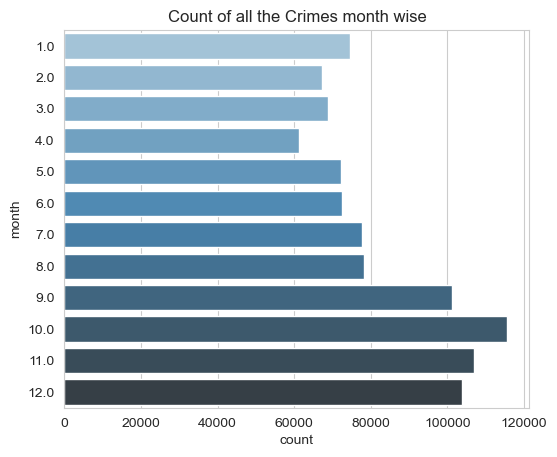

In [20]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
sns.countplot(y='month', data=results_df,palette="Blues_d",ax=ax)
plt.title('Count of all the Crimes month wise')
plt.show()

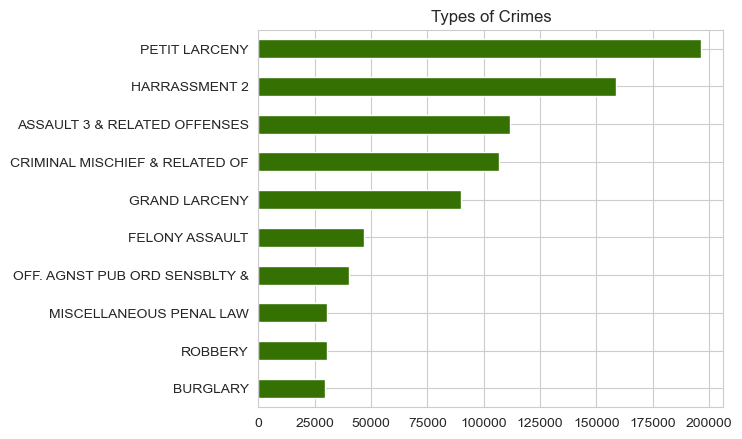

In [21]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
results_df.ofns_desc.value_counts().iloc[:10].sort_values().plot(kind="barh", color = '#347002',title = "Types of Crimes",ax=ax)
plt.show()

In [22]:
boro_df = results_df.groupby(['cmplnt_fr_dt']).agg({'cmplnt_fr_dt':'count'})
boro_df = results_df.groupby(['boro_nm']).agg({'cmplnt_num':'count'})
crimes_per_boro = boro_df.sort_values('cmplnt_num', ascending=False)

In [23]:
crimes_per_boro 

,cmplnt_num
boro_nm,
BROOKLYN,288283
MANHATTAN,244907
BRONX,218678
QUEENS,205687
STATEN ISLAND,41592


In [24]:
cpb_prop = crimes_per_boro.assign(percentage = crimes_per_boro.cmplnt_num / sum(crimes_per_boro.cmplnt_num))
cpb_prop = cpb_prop.reset_index()

In [25]:
x = cpb_prop['boro_nm']
y = cpb_prop['percentage']
colors = ['#2299aa', '#40b0bf', '#65c6d4', '#98dee8', '#c7f2f9']

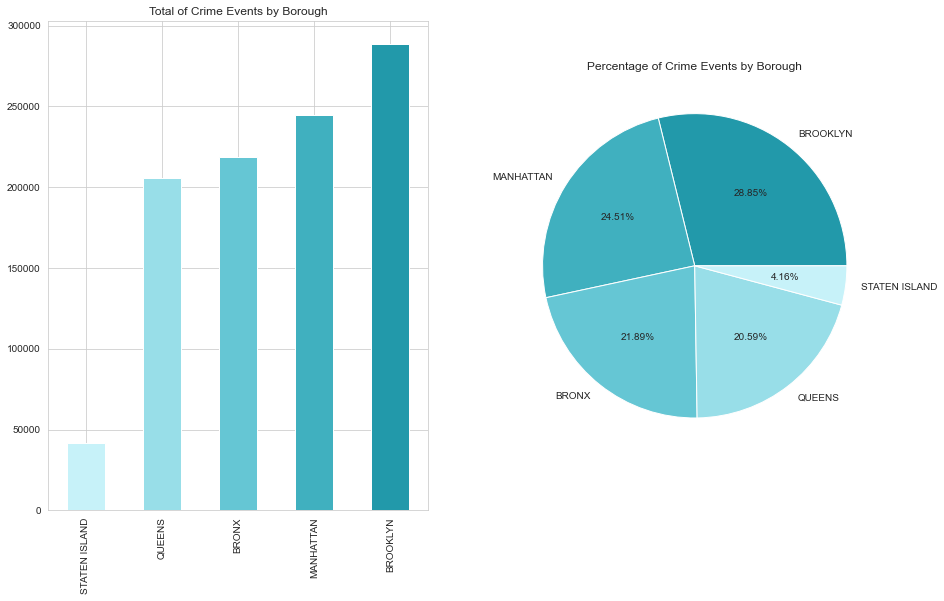

In [26]:
fig, ax= plt.subplots(1,2,figsize=(15,9))
plt.subplot(1, 2, 1)
plot = results_df['boro_nm'].value_counts().sort_values().plot(kind="bar", color = list(reversed(colors)), title = 'Total of Crime Events by Borough')
plt.subplot(1, 2, 2)
plt.pie(y,labels=x,colors=colors,autopct = '%0.2f%%')
plt.title('Percentage of Crime Events by Borough')
plt.show()

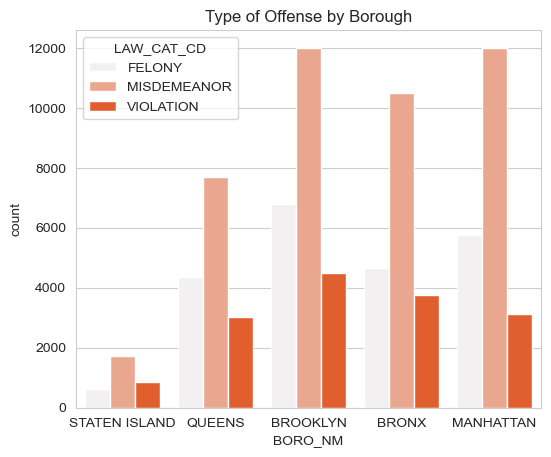

In [27]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
sns.countplot(x='BORO_NM', hue="LAW_CAT_CD", data=df,ax=ax,color='#ff5110')
plt.title('Type of Offense by Borough')
plt.show()

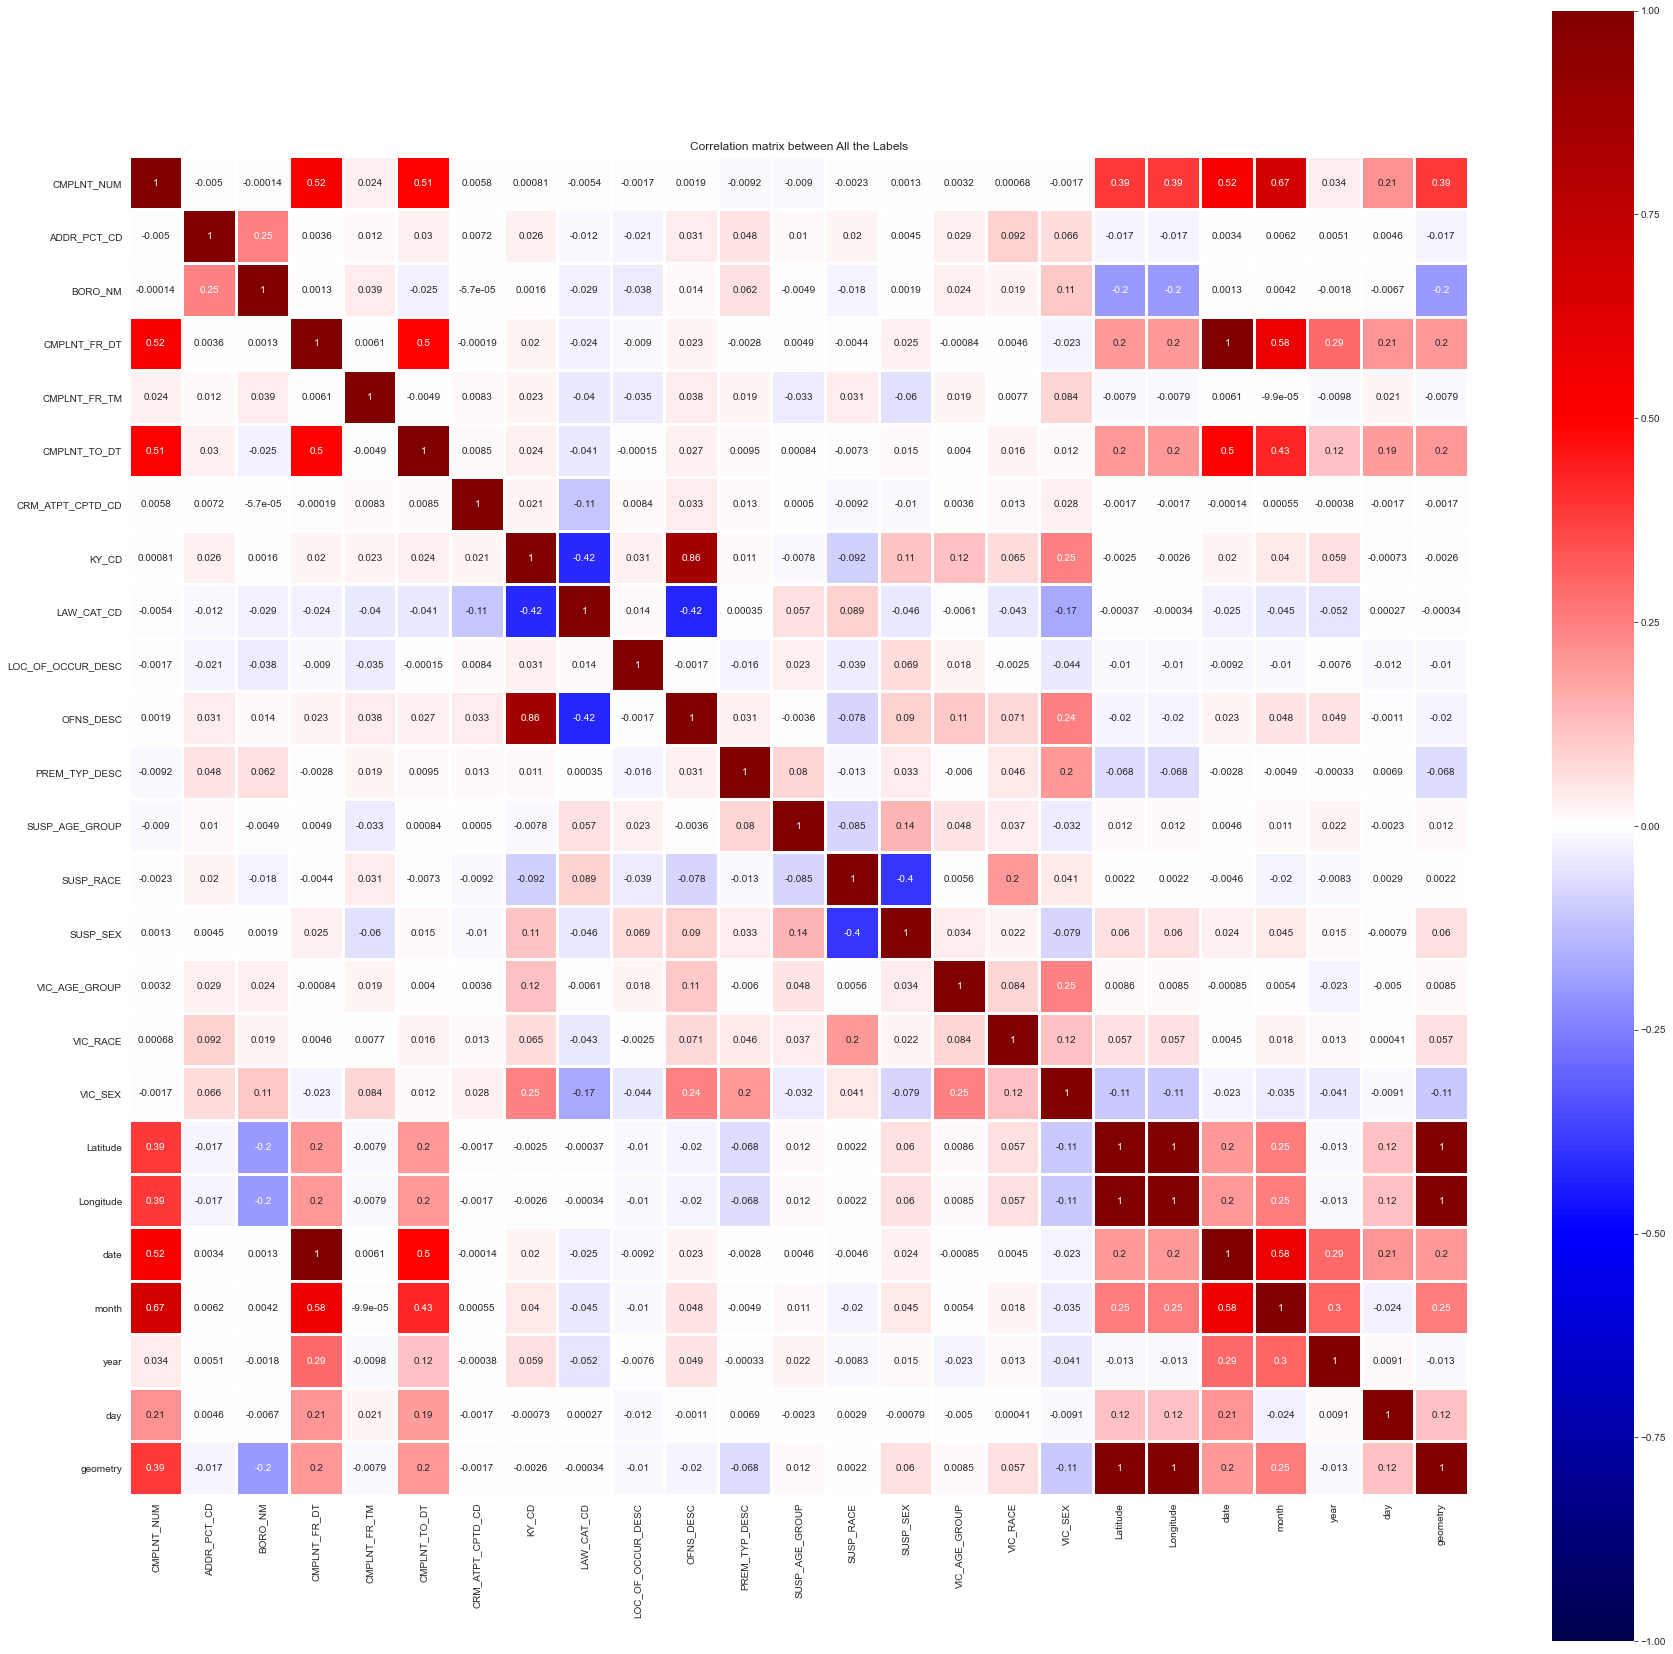

In [126]:
corr = df.apply(lambda x : pd.factorize(x)[0]).corr()
plt.figure(figsize = (30,30))
sns_plot = sns.heatmap(corr, cmap = "seismic", linewidth = 2, linecolor = "white", annot=True,vmin=-1, vmax=1, center=0, square=True)
plt.title('Correlation matrix between All the Labels')
plt.savefig("corr.png")

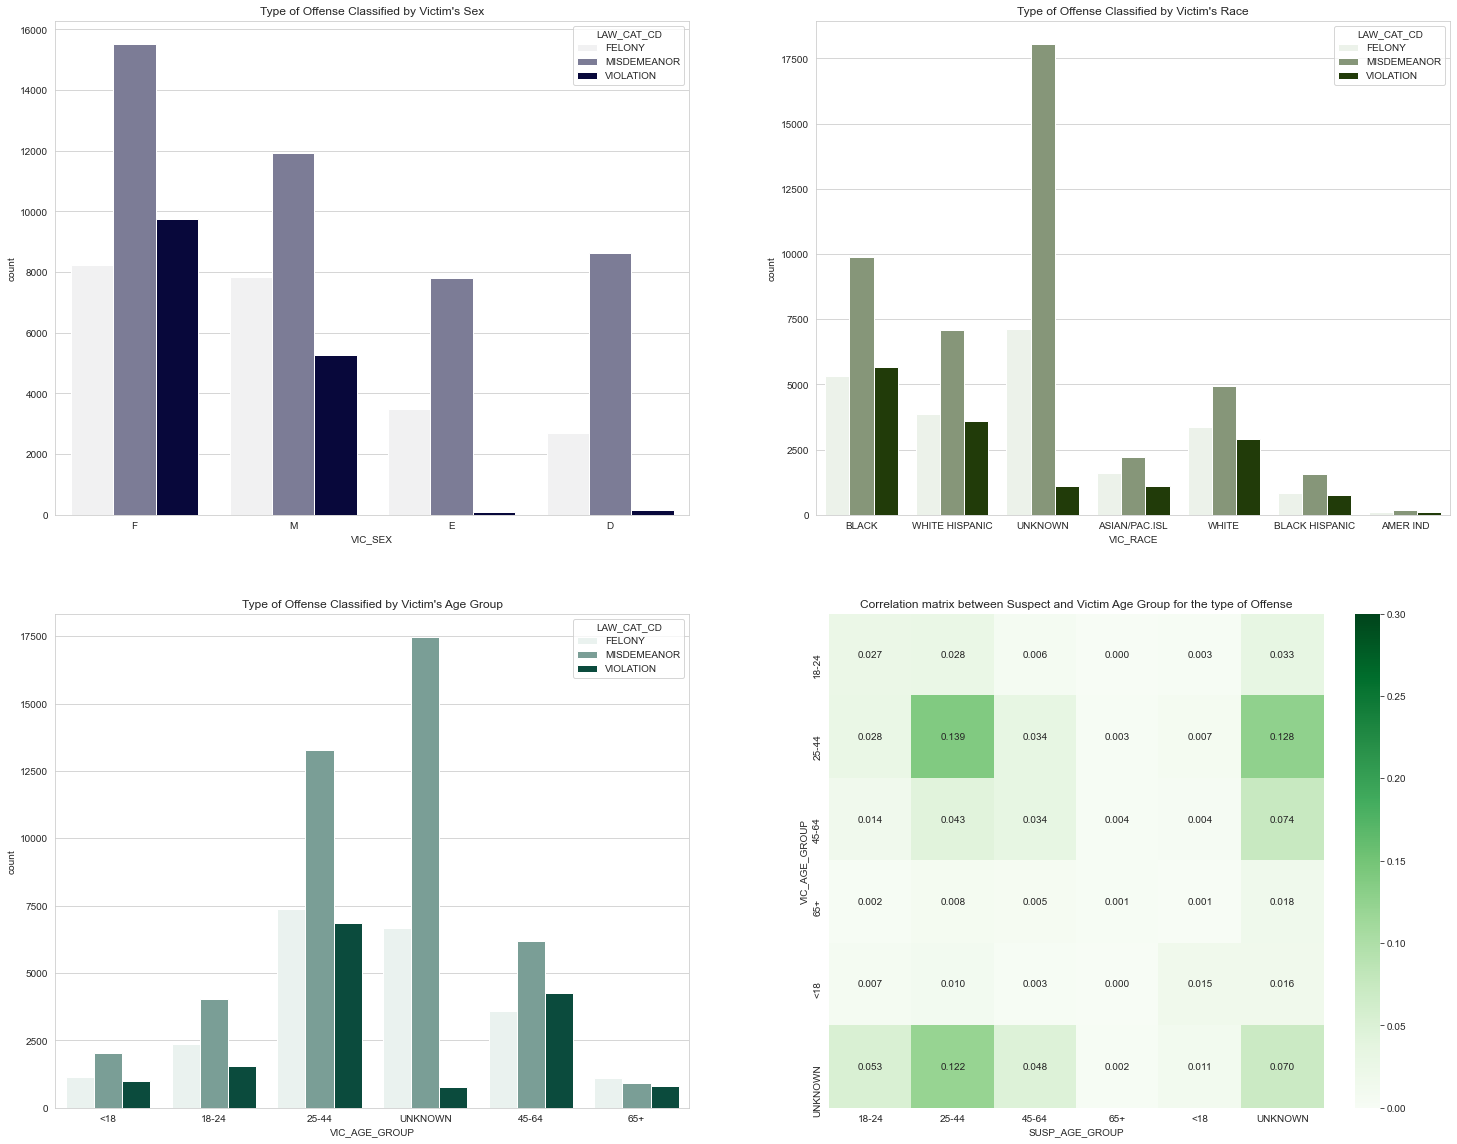

In [28]:
fig, ax= plt.subplots(2,2,figsize=(25,20))
sns.countplot(x='VIC_SEX', hue="LAW_CAT_CD", data=df,ax=ax[0,0],color='#000043')
ax[0,0].set_title("Type of Offense Classified by Victim's Sex")
sns.countplot(x='VIC_AGE_GROUP', hue="LAW_CAT_CD", data=df,ax=ax[1,0],color='#005643')
ax[1,0].set_title("Type of Offense Classified by Victim's Age Group")
sns.countplot(x='VIC_RACE', hue="LAW_CAT_CD", data=df,ax=ax[0,1],color='#214301')
ax[0,1].set_title("Type of Offense Classified by Victim's Race")
cross_table = df.groupby(['SUSP_AGE_GROUP', 'VIC_AGE_GROUP'])['LAW_CAT_CD'].count()
cross_table = cross_table.divide(cross_table.sum(), axis=0).unstack(level=0)
sns.heatmap(cross_table, cmap="Greens",square=True,vmin=0, vmax=0.30,annot=True,fmt='.3f',ax=ax[1,1])
ax[1,1].set_title('Correlation matrix between Suspect and Victim Age Group for the type of Offense')
plt.show()

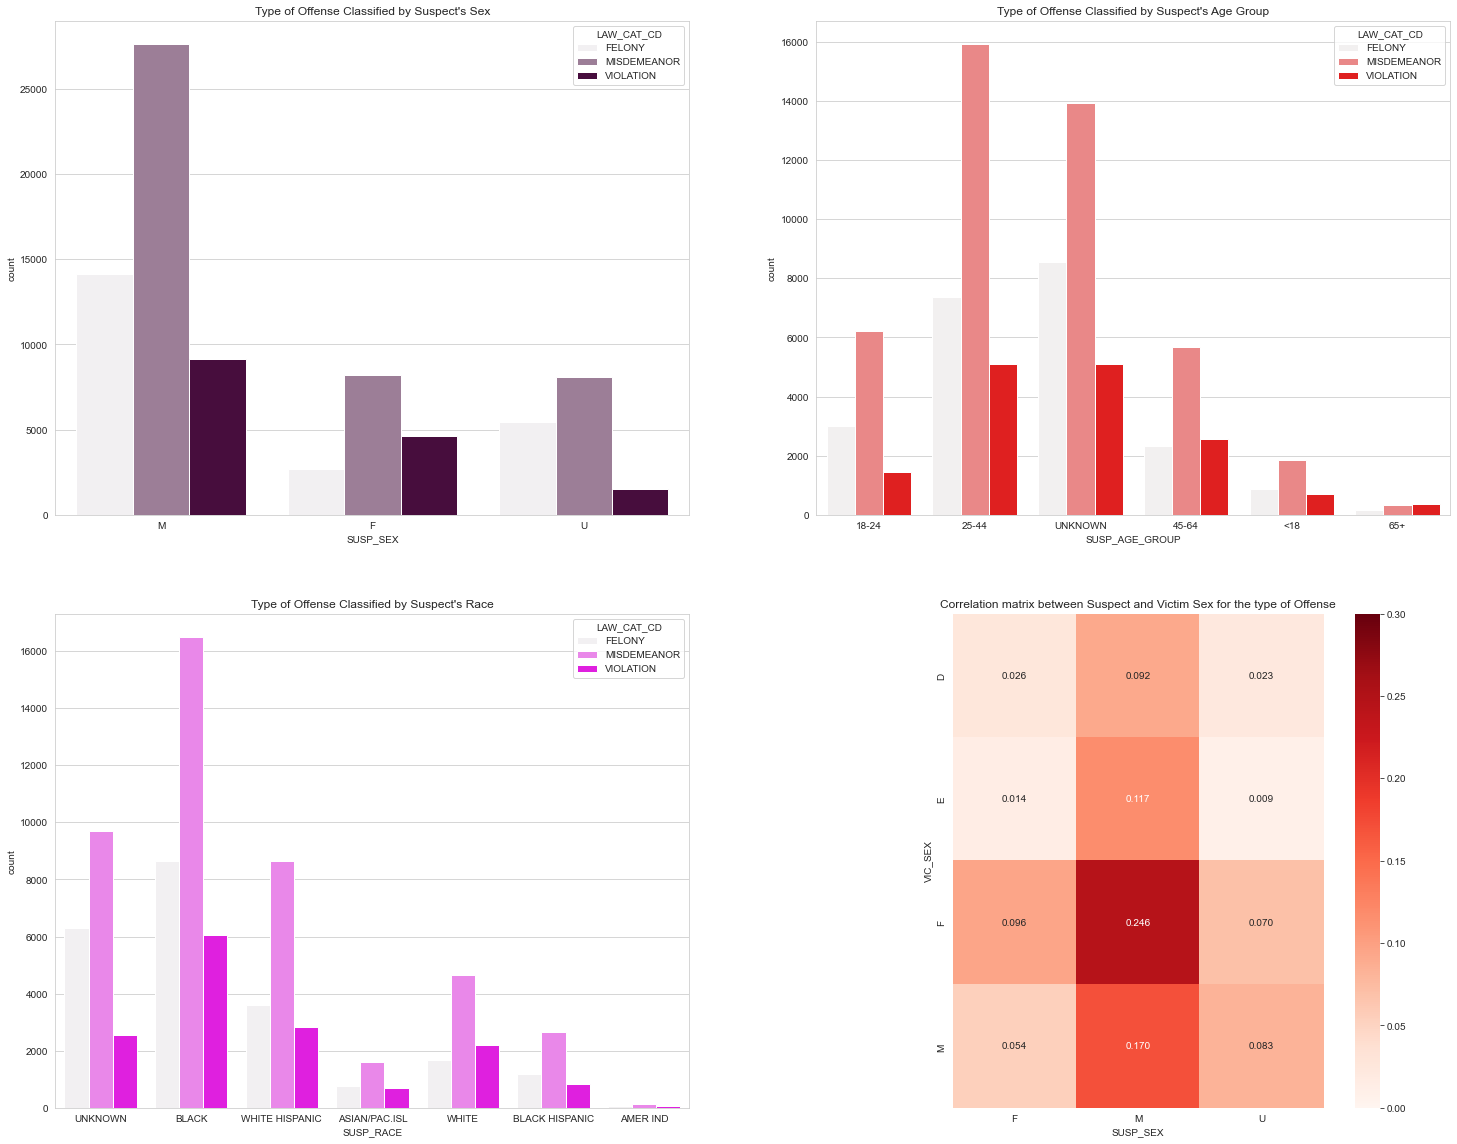

In [29]:
fig, ax= plt.subplots(2,2,figsize=(25,20))
sns.countplot(x='SUSP_SEX', hue="LAW_CAT_CD", data=df,ax=ax[0,0],color='#510343')
ax[0,0].set_title("Type of Offense Classified by Suspect's Sex")
sns.countplot(x='SUSP_AGE_GROUP', hue="LAW_CAT_CD", data=df,ax=ax[0,1],color='#ff0000')
ax[0,1].set_title("Type of Offense Classified by Suspect's Age Group")
sns.countplot(x='SUSP_RACE', hue="LAW_CAT_CD", data=df,ax=ax[1,0],color='#ff00ff')
ax[1,0].set_title("Type of Offense Classified by Suspect's Race")
cross_table = df.groupby(['SUSP_SEX', 'VIC_SEX'])['LAW_CAT_CD'].count()
cross_table = cross_table.divide(cross_table.sum(), axis=0).unstack(level=0)
sns.heatmap(cross_table, cmap="Reds",square=True,vmin=0, vmax=0.30,annot=True,fmt='.3f',ax=ax[1,1])
ax[1,1].set_title('Correlation matrix between Suspect and Victim Sex for the type of Offense')
plt.show()

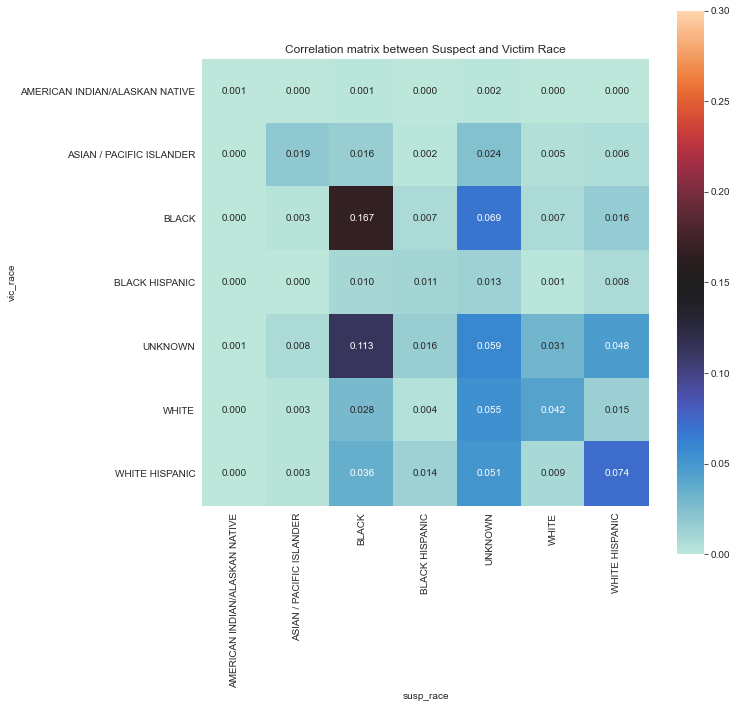

In [125]:
corr = results_df.groupby(['susp_race', 'vic_race'])['ofns_desc'].count()
corr = corr.divide(corr.sum(), axis=0).unstack(level=0)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(corr, cmap="icefire", ax=ax,square=True,vmin=0, vmax=0.30,annot=True,fmt='.3f',)
plt.title('Correlation matrix between Suspect and Victim Race')
plt.show()

In [83]:
df3 = df.dropna()
df3['date'] = df3['date'].astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57611 entries, 1 to 109542
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CMPLNT_NUM         57611 non-null  int64  
 1   ADDR_PCT_CD        57611 non-null  int64  
 2   BORO_NM            57611 non-null  object 
 3   CMPLNT_FR_DT       57611 non-null  object 
 4   CMPLNT_FR_TM       57611 non-null  object 
 5   CMPLNT_TO_DT       57611 non-null  object 
 6   CRM_ATPT_CPTD_CD   57611 non-null  object 
 7   KY_CD              57611 non-null  int64  
 8   LAW_CAT_CD         57611 non-null  object 
 9   LOC_OF_OCCUR_DESC  57611 non-null  object 
 10  OFNS_DESC          57611 non-null  object 
 11  PREM_TYP_DESC      57611 non-null  object 
 12  SUSP_AGE_GROUP     57611 non-null  object 
 13  SUSP_RACE          57611 non-null  object 
 14  SUSP_SEX           57611 non-null  object 
 15  VIC_AGE_GROUP      57611 non-null  object 
 16  VIC_RACE           57

/var/folders/fr/mj5thccj7v7f229nq8zkxvmc0000gn/T/ipykernel_15176/3754111277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date'] = df3['date'].astype(str)


In [119]:
f = open("config_color.txt", "r")
config = ast.literal_eval(f.read())
map1 = KeplerGl(data={'NYC_CRIMES': df3}, height=600, width=800)
map1.config = config
map1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '0xm03v7', 'type': …

In [120]:
map1.save_to_html(file_name = 'testtype.html')

Map saved to testtype.html!


In [121]:
%%html
<iframe src="testtype.html" width="1000" height="1000"></iframe>

In [122]:
f = open("config_hex.txt", "r")
config = ast.literal_eval(f.read())
map_Hexogon = KeplerGl(data={'NYC_CRIMES': df3}, height=600, width=800)
map_Hexogon.config = config
map_Hexogon

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'bxpdchi', 'type': …

In [123]:
map_Hexogon.save_to_html(file_name = 'hexamap_001.html')

Map saved to hexamap_001.html!


In [124]:
%%html
<iframe src="hexamap_001.html" width="1000" height="1000"></iframe>

In [108]:
def extract(dataframe):
    date= results_df['date']
    month=results_df['month']
    longitude=results_df["longitude"]
    latitude=results_df["latitude"]
    boro= results_df['boro_nm']
    loc=results_df['prem_typ_desc']
    cat = results_df['law_cat_cd']
    return pd.concat([date, month, boro, loc, latitude, longitude,cat], axis=1)

In [109]:
data = extract(results_df)

In [112]:
data

,date,month,boro_nm,prem_typ_desc,latitude,longitude,law_cat_cd
655,2020-12-31,12.0,BRONX,BEAUTY & NAIL SALON,40.837978220000025,-73.90714867299994,FELONY
656,2020-12-31,12.0,BROOKLYN,STREET,40.66934487900005,-73.873801127,FELONY
657,2020-12-31,12.0,MANHATTAN,HOTEL/MOTEL,40.782076545000045,-73.98083480299994,FELONY
658,2020-12-31,12.0,MANHATTAN,RESIDENCE - PUBLIC HOUSING,40.72380251300007,-73.97906933499998,MISDEMEANOR
659,2020-12-31,12.0,BROOKLYN,STREET,40.679739379000075,-73.93739801899994,FELONY
...,...,...,...,...,...,...,...
999995,2018-09-11,9.0,QUEENS,RESIDENCE-HOUSE,40.73743873700005,-73.75675355599996,FELONY
999996,2018-09-11,9.0,BROOKLYN,STREET,40.68327563500004,-73.96586771899997,MISDEMEANOR
999997,2018-09-11,9.0,BRONX,RESIDENCE - APT. HOUSE,40.87193055400007,-73.830258669,VIOLATION
999998,2018-09-11,9.0,BROOKLYN,RESIDENCE - PUBLIC HOUSING,40.69942830600007,-73.95002004299994,FELONY


In [111]:
data = data.dropna()

In [113]:
X = data.drop(['law_cat_cd'],axis=1)
Y = data['law_cat_cd']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [115]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(796574, 6) (796574,) (199144, 6) (199144,)


In [539]:
encoder = OrdinalEncoder()
encoder.fit(X_train)
X_train_encoded = encoder.transform(X_train)
encoder.fit(X_test)
X_test_encoded = encoder.transform(X_test)

In [541]:
X_test_encoded

array([[1.1700e+02, 0.0000e+00, 1.0000e+00, 5.3000e+01, 7.9450e+03,
        3.3957e+04],
       [4.5900e+02, 1.1000e+01, 4.0000e+00, 5.5000e+01, 7.9470e+03,
        5.1198e+04],
       [3.9800e+02, 9.0000e+00, 2.0000e+00, 6.2000e+01, 4.4592e+04,
        3.2103e+04],
       ...,
       [7.0800e+02, 7.0000e+00, 1.0000e+00, 3.0000e+01, 1.4650e+03,
        3.8096e+04],
       [7.3700e+02, 8.0000e+00, 1.0000e+00, 2.2000e+01, 7.8630e+03,
        4.8345e+04],
       [6.1300e+02, 4.0000e+00, 0.0000e+00, 6.2000e+01, 5.0834e+04,
        1.3197e+04]])

In [543]:
print(X_train_encoded.shape,y_train.shape,X_test_encoded.shape,y_test.shape)

(796574, 6) (796574,) (199144, 6) (199144,)


In [569]:
knn = KNeighborsClassifier(n_neighbors=7)
clf = knn.fit(X_train_encoded,y_train)
knn_p = clf.predict(X_test_encoded)
accuracy_knn = accuracy_score(y_test, knn_p)
print(accuracy_knn)

0.43502691519704334


In [578]:
dt = DecisionTreeClassifier(random_state=0,max_depth = 7)
dt = dt.fit(X_train_encoded,y_train)
dtp = dt.predict(X_test_encoded)
accuracy_dt = accuracy_score(y_test, dtp)
print(accuracy_dt)

0.5312638091029607


In [568]:
gnb = GaussianNB()
gnb = gnb.fit(X_train_encoded,y_train)
gnb_p = gnb.predict(X_test_encoded)
accuracy_nb = accuracy_score(y_test, gnb_p)
print(accuracy_nb)

0.5286325473024545


In [573]:
rf = RandomForestClassifier(max_depth=7, random_state=0)
rf.fit(X_train_encoded, y_train)
rfp = rf.predict(X_test_encoded)
accuracy_rf = accuracy_score(y_test, rfp)
print(accuracy_rf)

0.5287530631101113
